# Analyze and plot results

In [2]:
import torch
import matplotlib.pyplot as plt

## MNIST

In [6]:
# non_linearity="ReLU"
non_linearity="Sigmoid"
# budget, fr_TSSA = torch.load('./output/Dormammu/MNIST/fooling_rates_compared_nsample=10000_start=0_batch=0_StandardTwoStepSpectralAttack_budget-rates.pt', map_location=torch.device('cpu'))
# budget, fr_OSSA = torch.load('./output/Dormammu/MNIST/fooling_rates_compared_nsample=10000_start=0_batch=0_OneStepSpectralAttack_budget-rates.pt', map_location=torch.device('cpu'))
budget, fr_TSSA = torch.load(f'./output/Thanos/MNIST/fooling-rates/aa-ossa-tssa/fooling_rates_compared_nsample=10000_start=0_nl={non_linearity}()_batch=0_TwoStepSpectralAttack_budget-rates.pt', map_location=torch.device('cpu'))
budget, fr_OSSA = torch.load(f'./output/Thanos/MNIST/fooling-rates/aa-ossa-tssa/fooling_rates_compared_nsample=10000_start=0_nl={non_linearity}()_batch=0_OneStepSpectralAttack_budget-rates.pt', map_location=torch.device('cpu'))
budget, fr_AA = torch.load(f'./output/Thanos/MNIST/fooling-rates/aa-ossa-tssa/fooling_rates_compared_nsample=10000_start=0_nl={non_linearity}()_batch=0_AdversarialAutoAttack_budget-rates.pt', map_location=torch.device('cpu'))
fr_TSSA, fr_OSSA, fr_AA = torch.tensor(fr_TSSA), torch.tensor(fr_OSSA), torch.tensor(fr_AA)

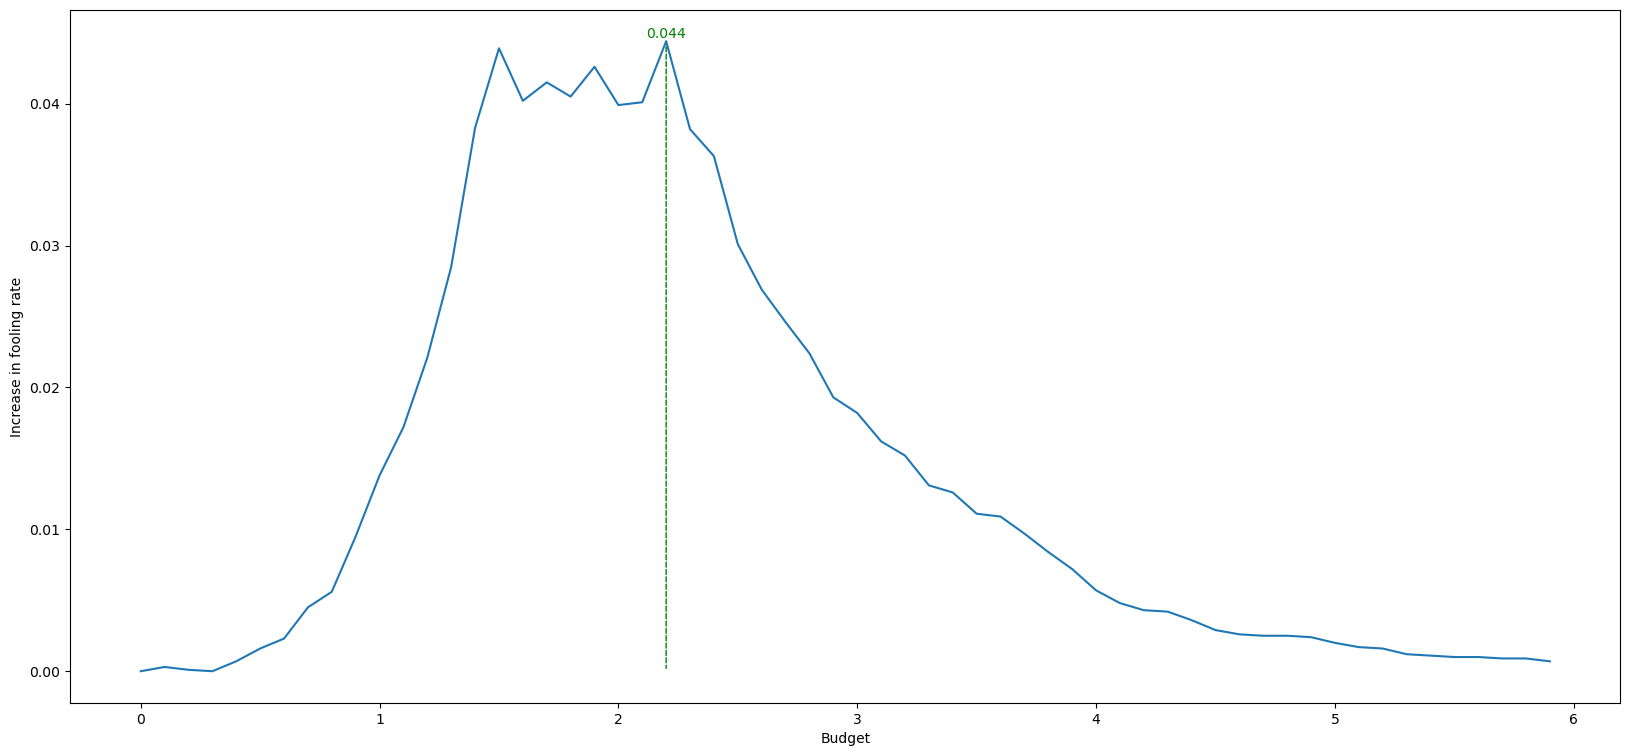

In [7]:
fr_diff = fr_TSSA - fr_OSSA
max_index = torch.argmax(fr_diff)
max_budget = budget[max_index]
max_diff = fr_diff[max_index]

plt.figure(figsize=(20,9))
plt.plot(budget, fr_diff)
plt.xlabel('Budget')
plt.ylabel('Increase in fooling rate')
plt.xticks(range(0,7))
plt.annotate(text=f'{max_diff:.3f}', ha = "center", va="bottom", xy=(max_budget, 0.), xytext=(max_budget, max_diff), arrowprops={'arrowstyle': '-', 'color': 'green', 'ls': '--'}, color = 'green')
# plt.savefig('./output/Dormammu/MNIST/fooling_rates_increase_plain.pdf', transparent=True, dpi=None)
plt.savefig(f'./output/Thanos/MNIST/fooling-rates/fooling_rates_increase_nsample=10000_nl={non_linearity}_tssa-ossa_plain.pdf', transparent=True, dpi=None)
plt.show()

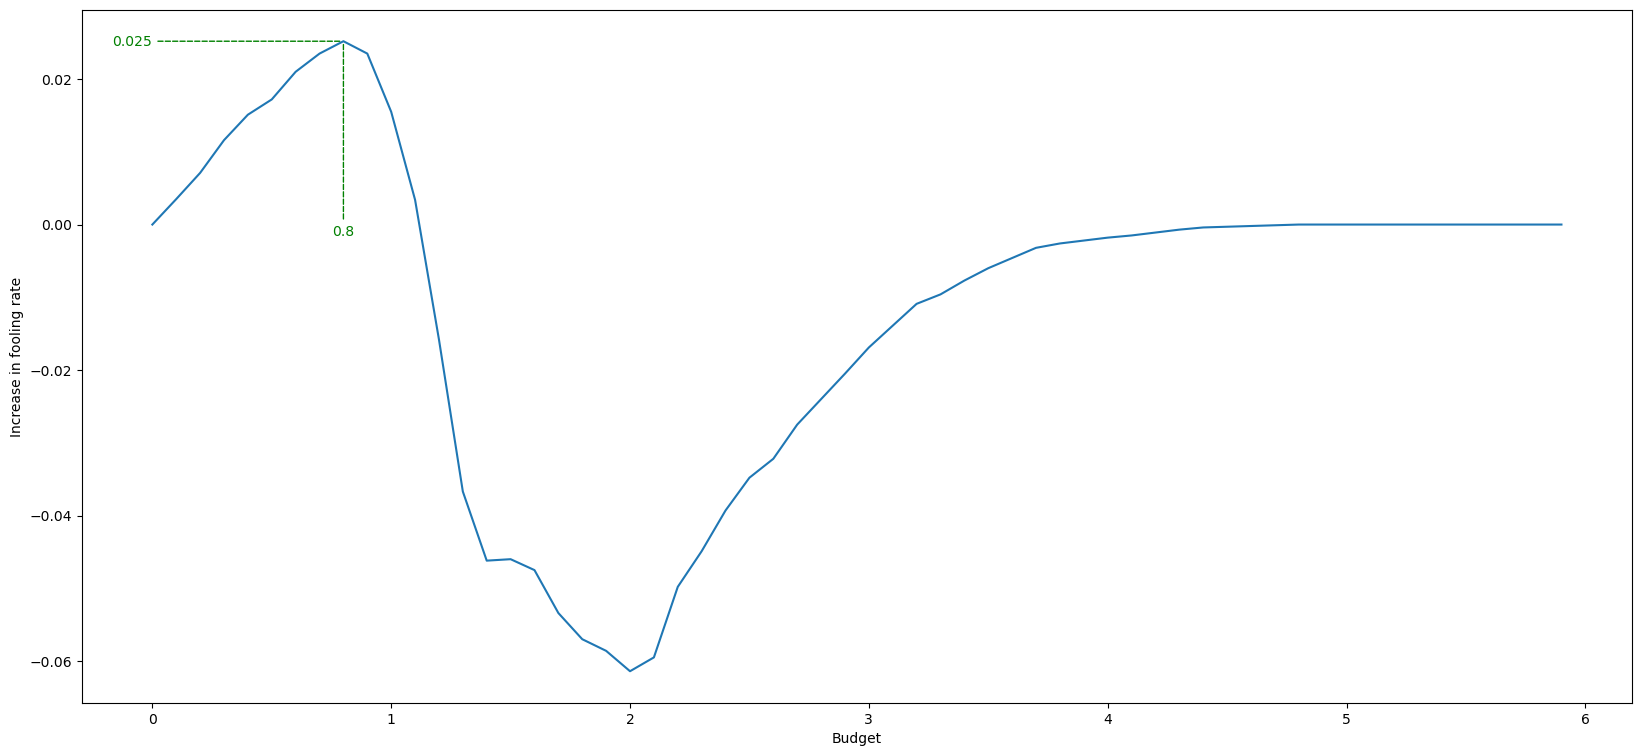

In [8]:
fr_diff = fr_TSSA - fr_AA
max_index = torch.argmax(fr_diff)
max_budget = budget[max_index]
max_diff = fr_diff[max_index]

plt.figure(figsize=(20,9))
plt.plot(budget, fr_diff)
plt.xlabel('Budget')
plt.ylabel('Increase in fooling rate')
plt.xticks(range(0,7))
# plt.annotate(text=f'{max_diff:.3f}', ha = "center", va="bottom", xy=(max_budget, 0.), xytext=(max_budget, max_diff), arrowprops={'arrowstyle': '-', 'color': 'green', 'ls': '--'}, color = 'green')
plt.annotate(text=f'{max_diff:.3f}', ha = "right", va="center", xy=(max_budget, max_diff), xytext=(0., max_diff), arrowprops={'arrowstyle': '-', 'color': 'green', 'ls': '--'}, color = 'green')
plt.annotate(text=f'{max_budget:.1f}', ha = "center", va="top", xy=(max_budget, max_diff), xytext=(max_budget, 0.), arrowprops={'arrowstyle': '-', 'color': 'green', 'ls': '--'}, color = 'green')
# plt.savefig('./output/Dormammu/MNIST/fooling_rates_increase_plain.pdf', transparent=True, dpi=None)
plt.savefig(f'./output/Thanos/MNIST/fooling-rates/fooling_rates_increase_nsample=10000_nl={non_linearity}_tssa-aa_plain.pdf', transparent=True, dpi=None)
plt.show()

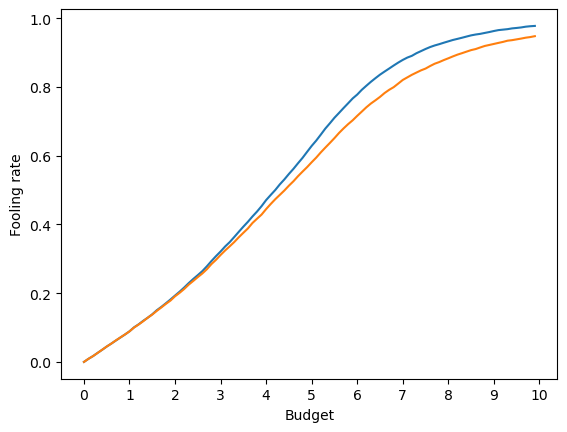

In [6]:
plt.plot(budget, fr_TSSA, label="TwoStepSpectralAttack")
plt.plot(budget, fr_OSSA, label="OneStepSpectralAttack")
plt.legend()
plt.xlabel('Budget')
plt.ylabel('Fooling rate')
plt.xticks(range(0,11))
plt.savefig('./output/Dormammu/MNIST/fooling_rates_compared_nsample=10000_start=0_batch=0_good_label.pdf', transparent=True, dpi=None)
plt.show()

## XOR

In [3]:
budget, fr_TSSA = torch.load('./output/XOR/fooling_rates_compared_nsample=5000_start=0_nl=Sigmoid()_batch=0_TwoStepSpectralAttack_budget-rates.pt', map_location=torch.device('cpu'))
budget, fr_OSSA = torch.load('./output/XOR/fooling_rates_compared_nsample=5000_start=0_nl=Sigmoid()_batch=0_OneStepSpectralAttack_budget-rates.pt', map_location=torch.device('cpu'))
fr_TSSA, fr_OSSA = torch.tensor(fr_TSSA), torch.tensor(fr_OSSA)

fr_diff = fr_TSSA - fr_OSSA
max_index = torch.argmax(fr_diff)
max_budget = budget[max_index]
max_diff = fr_diff[max_index]

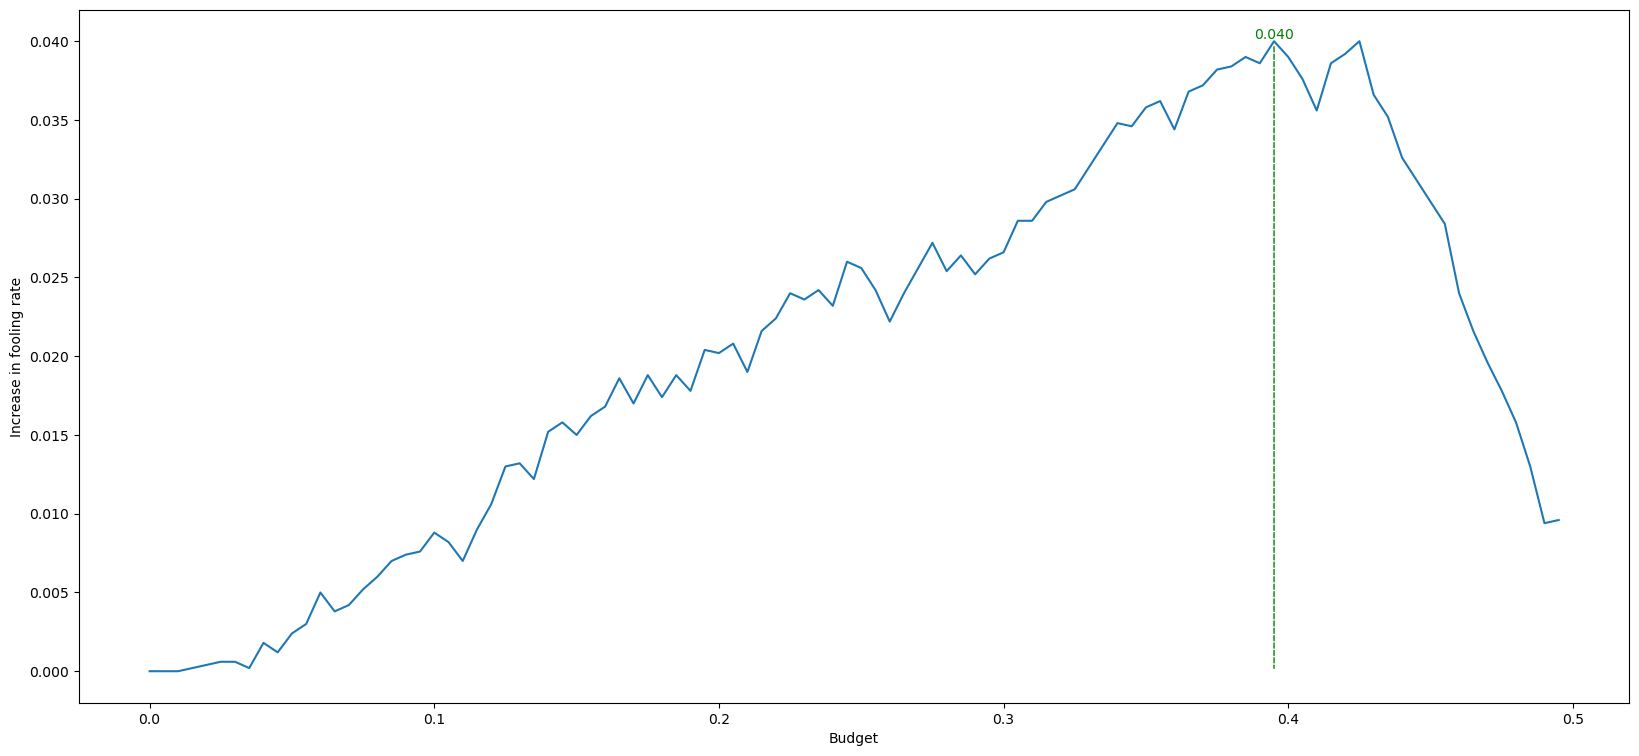

In [6]:
plt.figure(figsize=(20,9))
plt.plot(budget, fr_diff)
plt.xlabel('Budget')
plt.ylabel('Increase in fooling rate')
# plt.annotate(text=f'{max_diff:.3f}', ha = "center", va="bottom", xy=(max_budget, 0.), xytext=(max_budget, max_diff), arrowprops={'arrowstyle': '-', 'color': 'green', 'ls': '--'}, color = 'green')
plt.savefig('./output/XOR/fooling_rates_increase_plain_Sigmoid.pdf', transparent=True, dpi=None)
plt.show()